# open h5

In [1]:
# laod h5
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import neo

pathName = "Results/20201204/VAbenchmarks_exc_nest_20201204-164459.h5"
with neo.NixIO(pathName) as io:
    block = io.read_block()
# start from here to open nix-hdf5

# open pickle file

In [2]:
import pickle 

def getPklData(pathData):
    fileHandle = open(pathData, 'rb')
    neoObj = pickle.load(fileHandle)
    #segments = neoObj.segments[0]
    #inputSpikes = segments.spiketrains
    #voltage = segments.analogsignals[0]
    return neoObj

pathData = "./Results/20201204/VAbenchmarks_exc_nest_20201204-164511.pkl"
neoObj = getPklData(pathData)


# spikes comparison between neo and nixio

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def compareSpikes(spikesNeo, spikesNixio, alpha=.8):
    #n_panels = sum(a.shape[1] for a in signal.segments[0].analogsignals) + 1
    n_panels = len(spikesNeo.segments[0].analogsignals) +1 
    fig, axs = plt.subplots(n_panels, 1, figsize=(12, 17))

    def plot_spiketrains(ax, segment, title, color):
        for spiketrain in segment.spiketrains[:100]:
            y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
            ax.plot(spiketrain, y, color)
            ax.set_ylabel(segment.name)
            ax.set_title(title)
            #ax.legend()
            #plt.setp(plt.gca().get_xticklabels(), visible=False)

    plot_spiketrains(axs[0], spikesNeo.segments[0], 'neo', '+r')
    plot_spiketrains(axs[1], spikesNixio.segments[0], 'nixio', '+b')
    
    return fig, axs



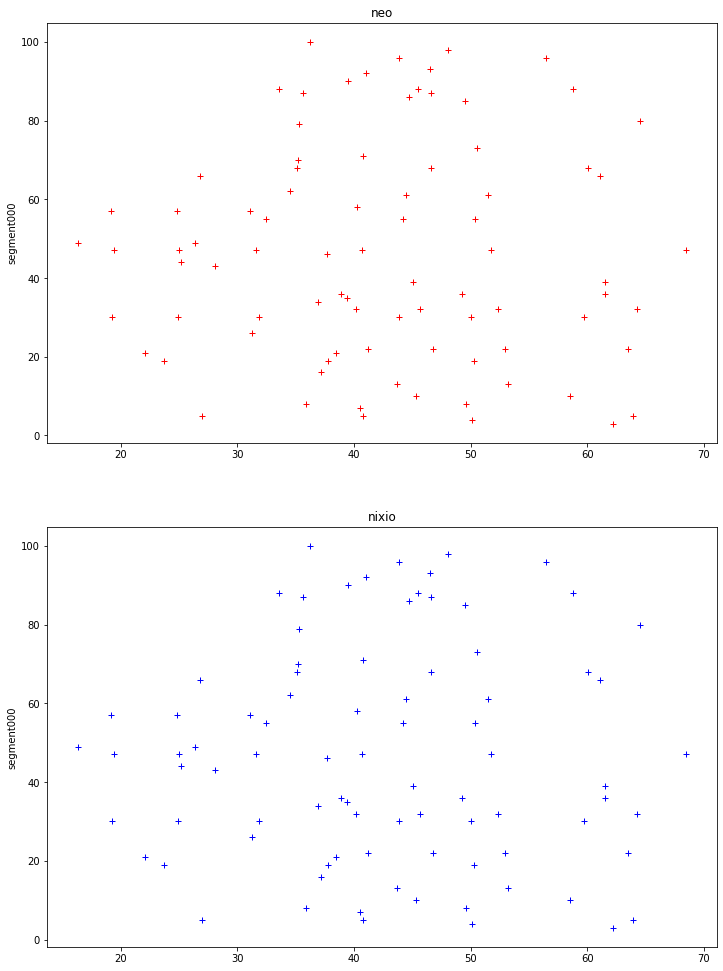

In [4]:
fig, axs = compareSpikes(neoObj,block)

# voltage comparison between neo and nixio file format

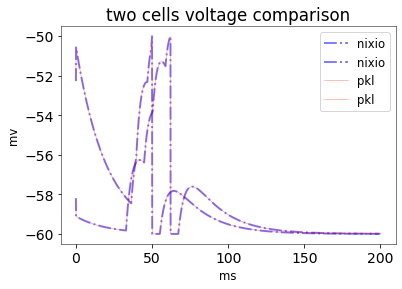

In [16]:
fig_settings = {
        'lines.linewidth': 0.5,
        'axes.linewidth': 0.5,
        'axes.labelsize': 'small',
        'legend.fontsize': 'small',
        'font.size': 14,
        #'figsize': (13, 5)
    }
plt.rcParams.update(fig_settings)
plt.plot(block.segments[0].analogsignals[0][0:2000].times, block.segments[0].analogsignals[0][0:2000], 'b-.', lw=2, label='nixio', alpha=.5)
plt.plot(neoObj.segments[0].analogsignals[0][0:2000].times, neoObj.segments[0].analogsignals[0][0:2000], 'r', ms=2, label='pkl', alpha=.5)
plt.title("two cells voltage comparison")
plt.xlabel("ms")
plt.ylabel("mv")
plt.legend()
plt.savefig("comparison.png")

# old plot function

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(signal, spikes, alpha=.8):
    fig_settings = {
        'lines.linewidth': 0.5,
        'axes.linewidth': 0.5,
        'axes.labelsize': 'small',
        'legend.fontsize': 'small',
        'font.size': 14
    }
    plt.rcParams.update(fig_settings)

    #n_panels = sum(a.shape[1] for a in signal.segments[0].analogsignals) + 1
    n_panels = len(signal.segments[0].analogsignals) +1 
    fig, axs = plt.subplots(n_panels, 1, figsize=(15, 21))

    def plot_spiketrains(ax, segment):
        for spiketrain in segment.spiketrains[:100]:
            y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
            ax.plot(spiketrain, y, '.')
            ax.set_ylabel(segment.name)
            #plt.setp(plt.gca().get_xticklabels(), visible=False)

    def plot_signal(ax, signal, index, colour='k'):
        label = "Neuron %d" % signal.annotations['source_ids'][index]
        ax.plot(signal.times, signal[:, index], colour, label=label, alpha=alpha)
        ax.set_ylabel("%s (%s)" % (signal.name, signal.units._dimensionality.string))
        #plt.setp(plt.gca().get_xticklabels(), visible=False)
        #plt.legend()

    plot_spiketrains(axs[0], spikes.segments[0])
    #plot_spiketrains(axs[1], all_spikes.segments[0])
    for i_panel, array in enumerate(signal.segments[0].analogsignals):
        for i in range(array.shape[1]):
            ax = axs[i_panel+1]
            plot_signal(ax, array, i, colour='bg'[i_panel % 2])
    ax.set_xlabel("time (%s)" % array.times.units._dimensionality.string)
    #plt.setp(plt.gca().get_xticklabels(), visible=True)
    return fig, axs

# pkl

In [ ]:
plot(neoObj, neoObj, alpha=.8)

# nixio

In [ ]:
plot(block, block, alpha=.8)